In [19]:
%load_ext autoreload
%autoreload 1
%aimport util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from amuse.units import units

import util

In [21]:
f = h5py.File("sim/simon_simulations/iopf_sim_ALPHA_-2_BETA_2_3_100/data_reb_100.h5")
f.keys()

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'sim/simon_simulations/iopf_sim_ALPHA_-2_BETA_2_3_100/data_reb_100.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
s0 = f["Step#0"]
s0.keys()

<KeysViewHDF5 ['a', 'ecc', 'energy', 'hash', 'inc', 'mass', 'ptype', 'radius', 'time', 'vx', 'vy', 'vz', 'x', 'y', 'z']>

In [ ]:
sorted_steps = util.sorted_steps(f)
hashes = sorted_steps[0]["hash"][0]
prop_table = util.prop_table(hashes)

# Mass growth over time (Figure 1 in IOPF VI)

![](images/figure-1.png)  

In [45]:
def plot_one_mass_growth_over_time(ax, p_hash, steps, **kwargs):
    mass = []
    time = []
    for step in steps:
        hashes = step["hash"][0]
        i, = np.where(hashes == p_hash)
        if i.size == 0:
            break
        mass.extend((step["mass"][:, i] | units.MSun).value_in(units.MEarth))
        time.extend(step["time"])
    ax.plot(time, mass, **kwargs)

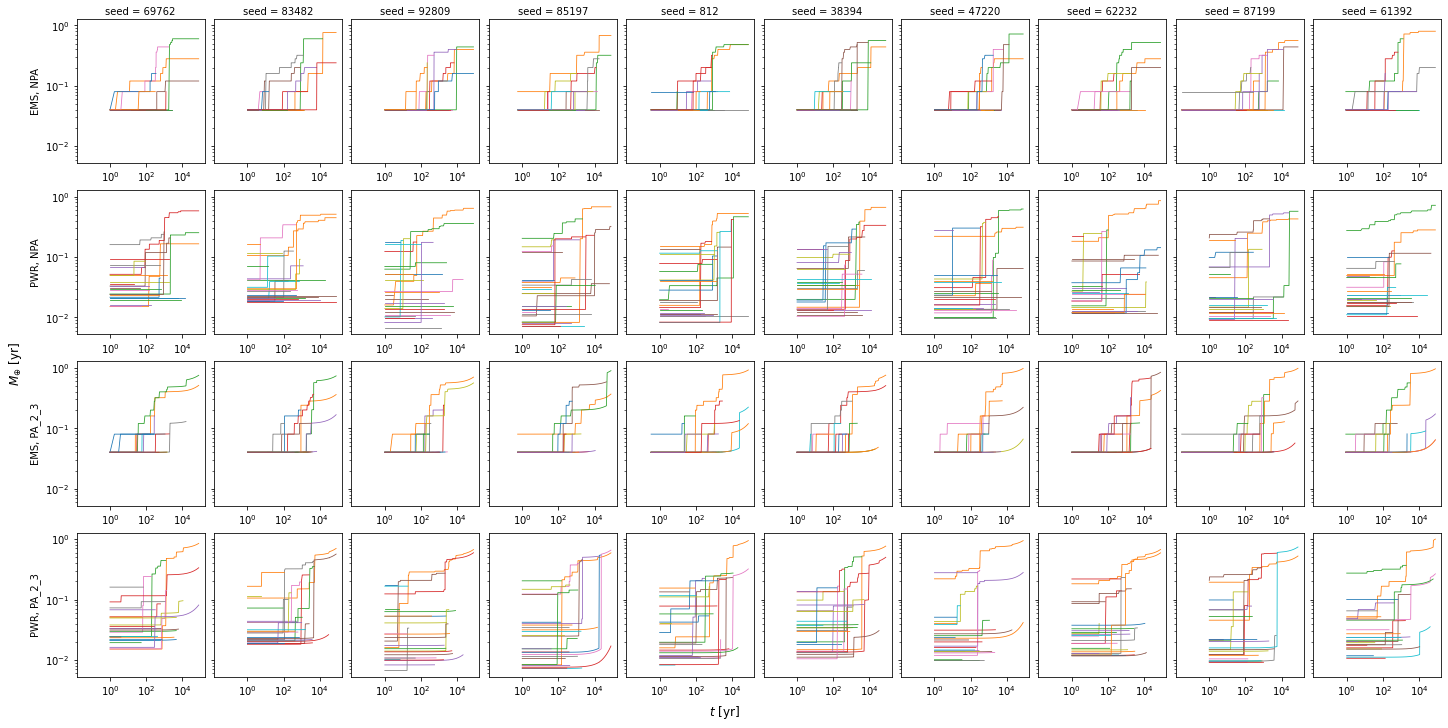

In [46]:
fig, axs = plt.subplots(4, 10, sharex=True, sharey=True, figsize=(20, 10), constrained_layout=True)

seed_order = (69762, 83482, 92809, 85197, 812, 38394, 47220, 62232, 87199, 61392)
seed_to_column = { seed: i for i, seed in enumerate(seed_order) }
for (alpha, beta, seed), h5path in util.find_all_simulations("sim/simon_simulations").items():
    # x = (seed // 100) - 1 # column of axis
    x = seed_to_column[seed]
    if beta is None:
        y = 0
    elif beta == "2_3":
        y = 2
    # elif beta == "4_3":
    #     y = 4
    if alpha is not None:
        y += 1
    ax = axs[y, x]

    f = h5py.File(h5path, "r")

    sorted_steps = util.sorted_steps(f)
    hashes = sorted_steps[0]["hash"][0]
    prop_table = util.prop_table(hashes)

    for p_hash in hashes[1:]:
        plot_one_mass_growth_over_time(ax, p_hash, sorted_steps, linewidth=0.8, **prop_table[p_hash])
    ax.set_xscale('log')
    ax.set_yscale('log')

    if y == 0:
        ax.set_xlabel(f'seed = {seed}')
        ax.xaxis.set_label_position('top')

    if x == 0:
        ax.set_ylabel(f'{"EMS" if alpha is None else "PWR"}, {"NPA" if beta is None else f"PA_{beta}"}')

    ax.xaxis.set_tick_params(labelbottom=True)

    f.close()

fig.supxlabel('$t$ [yr]')
fig.supylabel('$M_{\oplus}$ [yr]')
fig.savefig("images/20220531_mass_over_time_grid.png", facecolor="white")
plt.show()

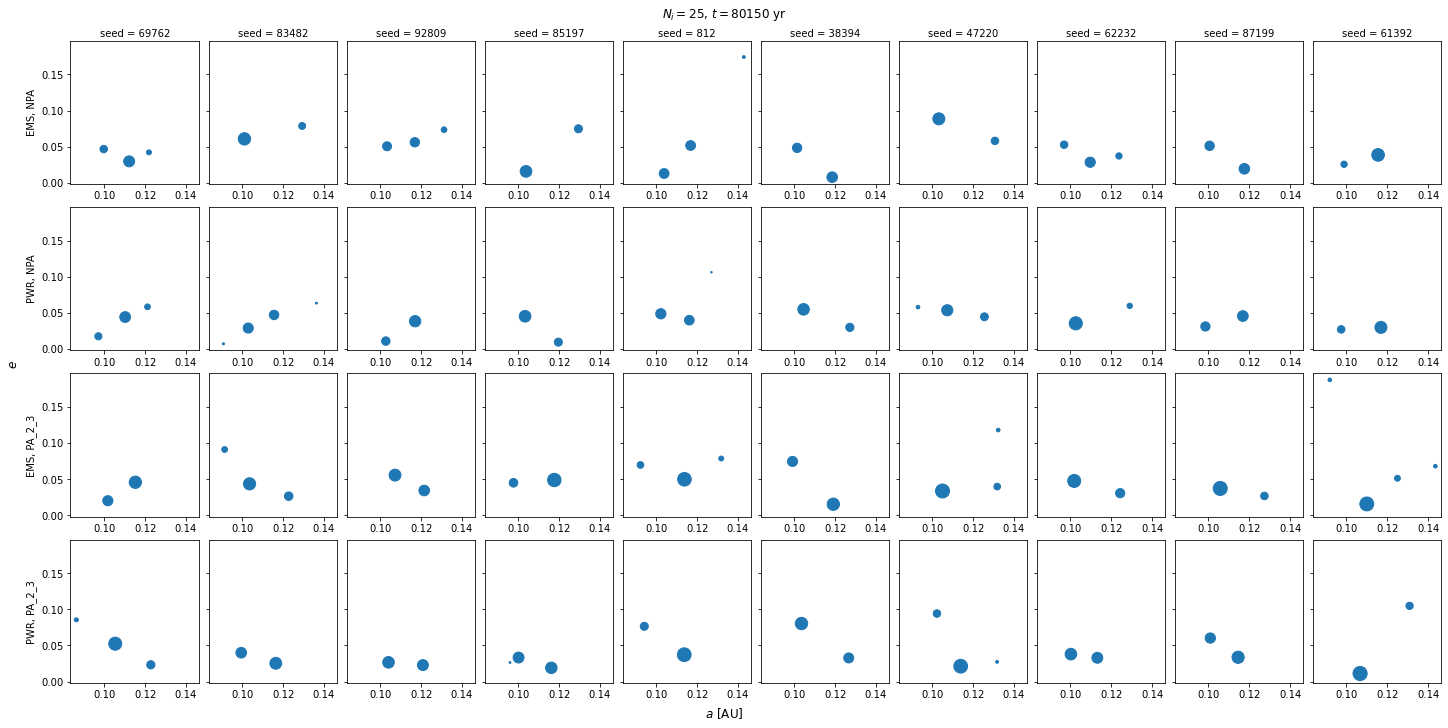

In [54]:
fig, axs = plt.subplots(4, 10, sharex=True, sharey=True, figsize=(20, 10), constrained_layout=True)

seed_order = (69762, 83482, 92809, 85197, 812, 38394, 47220, 62232, 87199, 61392)
seed_to_column = { seed: i for i, seed in enumerate(seed_order) }
for (alpha, beta, seed), h5path in util.find_all_simulations("sim/simon_simulations").items():
    # x = (seed // 100) - 1 # column of axis
    x = seed_to_column[seed]
    if beta is None:
        y = 0
    elif beta == "2_3":
        y = 2
    # elif beta == "4_3":
    #     y = 4
    if alpha is not None:
        y += 1
    ax = axs[y, x]

    f = h5py.File(h5path, "r")

    sorted_steps = util.sorted_steps(f)
    step = sorted_steps[-1]
    ax.scatter(step["a"][-1, 1:], step["ecc"][-1, 1:], s=(step["mass"][-1, 1:]| units.MSun).value_in(units.MEarth)*200)

    if y == 0:
        ax.set_xlabel(f'seed = {seed}')
        ax.xaxis.set_label_position('top')

    if x == 0:
        ax.set_ylabel(f'{"EMS" if alpha is None else "PWR"}, {"NPA" if beta is None else f"PA_{beta}"}')

    ax.xaxis.set_tick_params(labelbottom=True)

    f.close()

fig.supxlabel('$a$ [AU]')
fig.supylabel('$e$')
fig.suptitle('$N_i = 25$, $t = 80150$ yr')
fig.savefig("images/20220531_ecc_a_grid.png", facecolor="white")
plt.show()

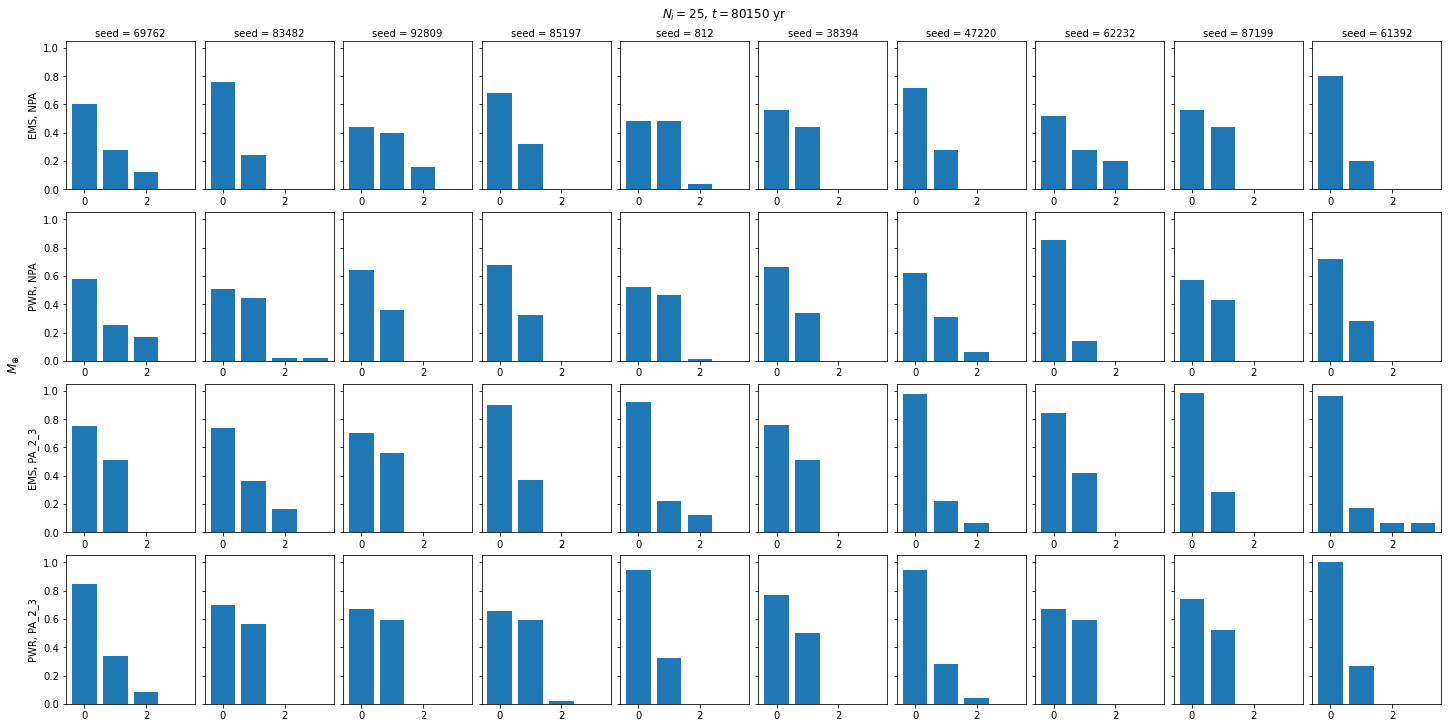

In [60]:
fig, axs = plt.subplots(4, 10, sharex=True, sharey=True, figsize=(20, 10), constrained_layout=True)

seed_order = (69762, 83482, 92809, 85197, 812, 38394, 47220, 62232, 87199, 61392)
seed_to_column = { seed: i for i, seed in enumerate(seed_order) }
for (alpha, beta, seed), h5path in util.find_all_simulations("sim/simon_simulations").items():
    # x = (seed // 100) - 1 # column of axis
    x = seed_to_column[seed]
    if beta is None:
        y = 0
    elif beta == "2_3":
        y = 2
    # elif beta == "4_3":
    #     y = 4
    if alpha is not None:
        y += 1
    ax = axs[y, x]

    f = h5py.File(h5path, "r")

    sorted_steps = util.sorted_steps(f)
    step = sorted_steps[-1]
    masses = np.zeros(4)
    s_m = np.sort((step["mass"][-1, 1:] | units.MSun).value_in(units.MEarth))[::-1]
    for i, m in enumerate(s_m):
        if i > 3:
            break
        masses[i] = m
    ax.bar([0, 1, 2, 3], masses)

    if y == 0:
        ax.set_xlabel(f'seed = {seed}')
        ax.xaxis.set_label_position('top')

    if x == 0:
        ax.set_ylabel(f'{"EMS" if alpha is None else "PWR"}, {"NPA" if beta is None else f"PA_{beta}"}')

    ax.xaxis.set_tick_params(labelbottom=True)

    f.close()

# fig.supxlabel('$a$ [AU]')
fig.supylabel('$M_{\oplus}$')
fig.suptitle('$N_i = 25$, $t = 80150$ yr')
fig.savefig("images/20220531_mass_grid.png", facecolor="white")
plt.show()

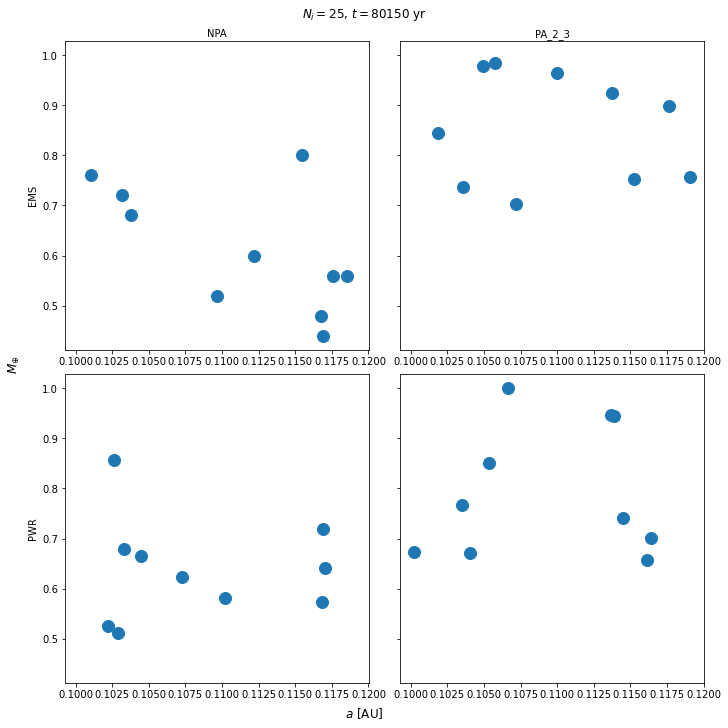

In [86]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10), constrained_layout=True)

for (alpha, beta, seed), h5path in util.find_all_simulations("sim/simon_simulations").items():
    if beta is None:
        x = 0
    elif beta == "2_3":
        x = 1
    if alpha is None:
        y = 0
    else:
        y = 1
    ax = axs[y, x]

    f = h5py.File(h5path, "r")

    sorted_steps = util.sorted_steps(f)
    step = sorted_steps[-1]
    h_m_a = np.stack([step["a"][-1, 1:], (step["mass"][-1, 1:] | units.MSun).value_in(units.MEarth)])
    ax.plot(*h_m_a[:, np.argmax(h_m_a[1])], "o", color="#1f77b4", markersize=12)
    ax.hlines

    if y == 0:
        ax.set_xlabel("NPA" if beta is None else "PA_2_3")
        ax.xaxis.set_label_position('top')
    if x == 0:
        ax.set_ylabel("EMS" if alpha is None else "PWR")

    ax.xaxis.set_tick_params(labelbottom=True)

    # ax.hlines(0.5, *ax.get_xlim(), linestyles='dashed')

    f.close()

fig.supxlabel('$a$ [AU]')
fig.supylabel('$M_{\oplus}$')
fig.suptitle('$N_i = 25$, $t = 80150$ yr')
fig.savefig("images/20220531_primary_mass_a_scatter.png", facecolor="white")
plt.show()

In [74]:
f = h5py.File(h5path, "r")

sorted_steps = util.sorted_steps(f)
step = sorted_steps[-1]
h_m_a = np.stack([(step["mass"][-1, 1:] | units.MSun).value_in(units.MEarth), step["a"][-1, 1:]])
h_m_a[:, np.argmax(h_m_a[0])]

array([ 0.75362515,  0.11522074])

In [73]:
a = np.array([[2, 1], [3, 4]])
a[:, np.argsort(a[0])]

array([[1, 2],
       [4, 3]])

In [79]:
plt.rcParams["axes.prop_cycle"]

'#1f77b4'
'#ff7f0e'
'#2ca02c'
'#d62728'
'#9467bd'
'#8c564b'
'#e377c2'
'#7f7f7f'
'#bcbd22'
'#17becf'
